In [1]:
import sys

sys.path.append('../')

# Atividade 1 - Tranformações Lineares e Determinante

Esse notebook demonstra a aplicação das matrizes de transformação criadas na atividade anterior — Rotação Horária a 90 graus seguida de
Cisalhamento Horizontal. Além disso, pode ser visualizado a "área" do valor do Determinante após as transformações lineares. Por fim, iremos aplicar o Produto Dot, que é uma operação algébrica entre 2 vetores que retorna um escalar.

Primeiro importamos a função `plot_vectors` para criar as visualizações gráfica e `numpy` para realizar os cálculos

In [2]:
import numpy as np

from src.utils.plot_vectors import plot_vectors

## Aplicação das Transformações Lineares

Temos os vetores unitários:
$$\vec i = \begin{pmatrix}1 \\ 0
            
            \end{pmatrix}$$
$$\vec j = \begin{pmatrix}0 \\ 1
            
            \end{pmatrix}$$

Também temos as matrizes de rotação e shear horizontal:

$$

M_{rota\c{c}ão} = \begin{bmatrix}0 & 1 \\
            
            -1 & 0\end{bmatrix}
            
$$

$$

M_{shear} = \begin{bmatrix}1 & 2 \\
            
            0 & 1\end{bmatrix}     

$$

Aplicando as trannsformações lineares, obtemos:

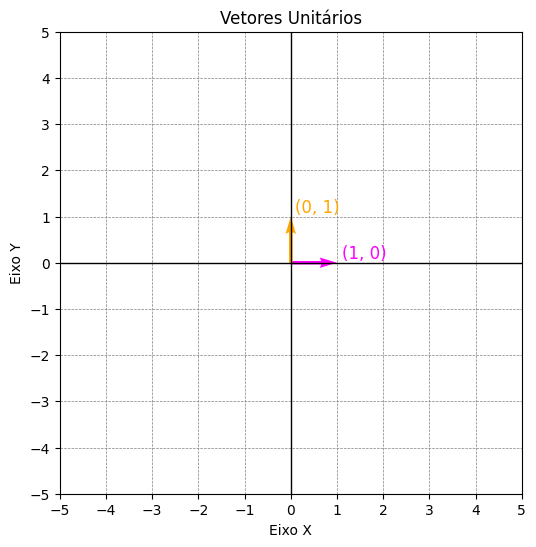

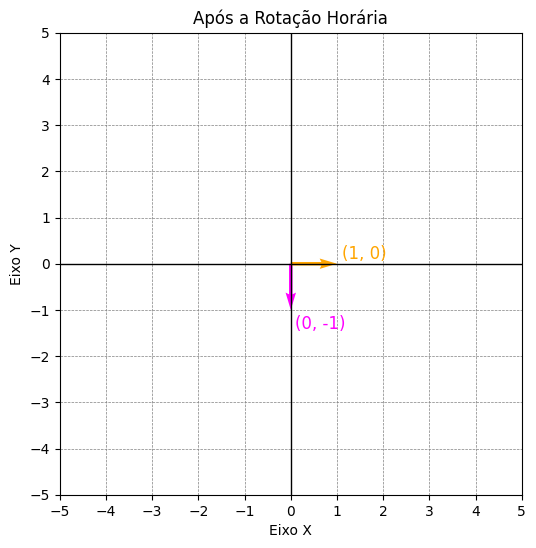

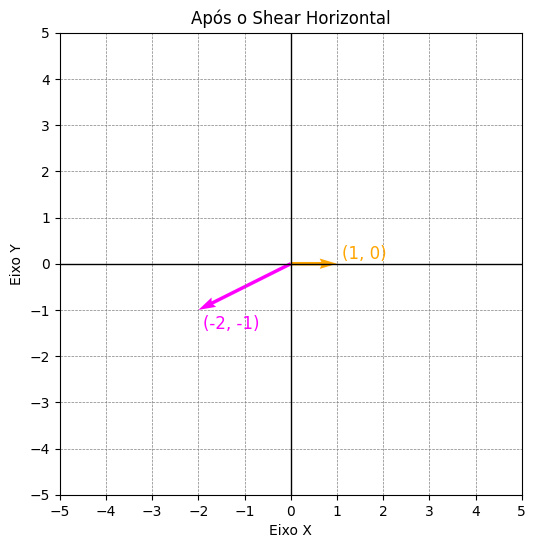

In [3]:
unit_vectors = np.array([[1, 0], [0, 1]])


rotation_matrix = np.array([[0, 1], [-1, 0]])
rotationed_vectors = np.array([rotation_matrix @ vector for vector in unit_vectors])

def get_shear_matrix(k: float) -> np.ndarray:
    return np.array([[1, k], [0, 1]])
k = 2
shear_matrix = get_shear_matrix(k)
sheared_vectors = np.array([shear_matrix @ vector for vector in rotationed_vectors])

plot_vectors('Vetores Unitários', unit_vectors)
plot_vectors('Após a Rotação Horária', rotationed_vectors)
plot_vectors('Após o Shear Horizontal', sheared_vectors)

## Determinante

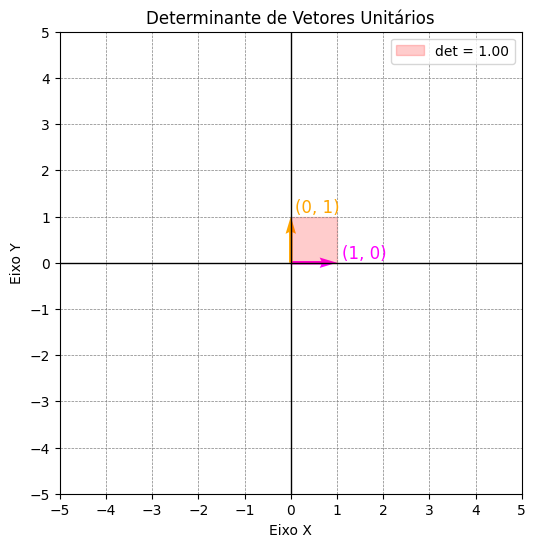

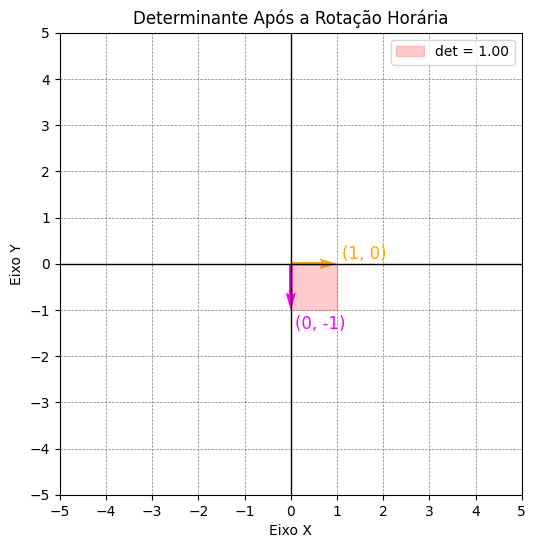

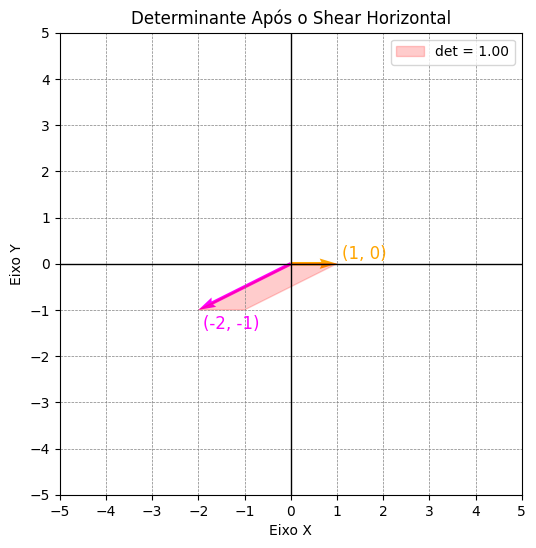

In [4]:
plot_vectors('Determinante de Vetores Unitários', unit_vectors, True)
plot_vectors('Determinante Após a Rotação Horária', rotationed_vectors, True)
plot_vectors('Determinante Após o Shear Horizontal', sheared_vectors, True)